# Home Credit Default Risk (HCDR) Keras Starter

This notebook should help you with a simple Deep Neural Network model in Keras for the HCDR Final Project.
You can use the simple model below after you modify it use your data.
There are quite a few hyperparameters to play with, and it may get too time consuming to run thru complex GridSearch, so it may be a good idea to simplify that proces to an arbitrary architecture, and default parameters


In [ ]:
# ...  You will have to set up your data from HCDR project ...

# Keras DNN Example

## Keras Model 31-8-32-16

In [1]:
import time

import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from keras.utils.vis_utils import model_to_dot
from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier  

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import SVG

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
def create_model(optimizer='adagrad',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.2):
    
    model = Sequential()

    # You will need to adjust that input_dim parameter for your own data
    model.add(Dense(8, input_dim=31, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model


model = Sequential()


In [3]:
model = create_model()
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
__________________________

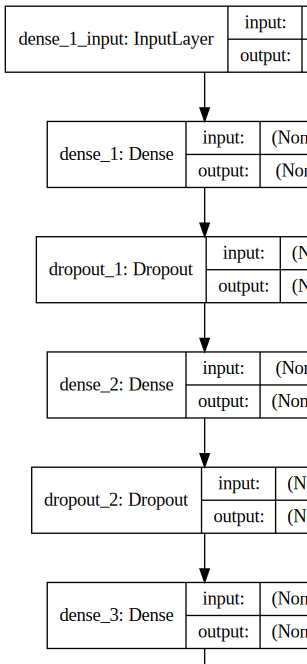

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [147]:
# You need to derive the X data from HCDR, and deal with train/validation/test sets more appropriately 
X_train, X_test, y_valid, y_valid = train_test_split(X_train, train_labels, test_size=0.05, random_state=42)

In [148]:
%time 
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs


In [150]:
%%time
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    epochs=3, 
                    batch_size=32, 
                    verbose=1)

Train on 292135 samples, validate on 15376 samples
Epoch 1/3
292135/292135 [==============================] - 16s 56us/step - loss: 0.2638 - acc: 0.9193 - val_loss: 0.2569 - val_acc: 0.9184
Epoch 2/3
292135/292135 [==============================] - 15s 52us/step - loss: 0.2567 - acc: 0.9193 - val_loss: 0.2539 - val_acc: 0.9184
Epoch 3/3
292135/292135 [==============================] - 15s 52us/step - loss: 0.2557 - acc: 0.9193 - val_loss: 0.2546 - val_acc: 0.9184
CPU times: user 1min 3s, sys: 11.7 s, total: 1min 15s
Wall time: 47.5 s


In [152]:
# You need to have that X_test, y_test avaliable before using it here
%time 
preds_test = model.predict_classes(X_test, verbose=1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.1 µs
15376/15376 [==============================] - 0s 29us/step


In [155]:
print("DNN Accuracy is {0:.2f}".format(accuracy_score(y_test, preds_test) * 100))

DNN Accuracy is 91.84
